In [1]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import glob
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [4]:
import imblearn
from imblearn.over_sampling import SMOTE 

In [6]:
asteroid_df = pd.read_csv("data/asteroid_normalized_small_df.csv")
asteroid_df.drop(columns = ['diameter', 'albedo', 'a', 'i', 'neo'], inplace = True)
asteroid_df

,pha,H,e,q,n,moid,spkid,full_name
0,0,-7.411043,-0.608738,0.289176,-0.009788,0.306452,20000001,1 Ceres (A801 AA)
1,0,-6.932515,0.859223,-0.382876,-0.017945,-0.258065,20000002,2 Pallas (A802 FA)
2,0,-6.282209,1.108738,-0.618740,0.181077,-0.564516,20000003,3 Juno (A804 RA)
3,0,-7.466258,-0.503883,-0.357027,0.928222,-0.403226,20000004,4 Vesta (A807 FA)
4,0,-5.171779,0.440777,-0.444265,0.384992,-0.451613,20000005,5 Astraea (A845 XA)
...,...,...,...,...,...,...,...,...
137912,0,-3.141104,8.195146,6.101777,-3.502333,6.048387,3547316,(2010 BK118)
137913,0,-0.319018,7.751456,2.129241,-3.470979,2.258065,3516402,(2010 GW64)
137914,0,-1.306748,8.038835,4.859451,-3.497338,5.290323,3517549,(2010 GW147)
137915,0,-0.503067,7.960194,0.447496,-3.476215,0.903226,3523334,(2010 JH124)


In [7]:
print(asteroid_df.dtypes)

pha            int64
H            float64
e            float64
q            float64
n            float64
moid         float64
spkid          int64
full_name     object
dtype: object


In [8]:
asteroid_df.isnull().sum()

pha          0
H            0
e            0
q            0
n            0
moid         0
spkid        0
full_name    0
dtype: int64

## Split data

In [9]:
exclude_col = ['pha', 'spkid', 'full_name']
X = asteroid_df.drop(columns = exclude_col)
y = asteroid_df.iloc[:]['pha']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [11]:
X_train.shape, y_train.shape

((110333, 5), (110333,))

In [12]:
X_test.shape, y_test.shape

((27584, 5), (27584,))

In [13]:
X_train.describe()

,H,e,q,n,moid
count,110333.000000,110333.000000,110333.000000,110333.000000,110333.000000
mean,-0.050451,0.073256,0.056583,0.056455,0.053393
std,0.872397,0.790674,0.836323,0.972270,0.825449
min,-7.466258,-1.374757,-3.696284,-3.502333,-2.241661
25%,-0.503067,-0.484466,-0.479806,-0.557912,-0.483871
50%,0.000000,0.000971,0.004847,-0.003263,0.000000
75%,0.490798,0.516505,0.516963,0.440457,0.500000
max,7.411043,8.195146,48.597738,28.942904,48.403226


## linear regression model

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()   # instantiate an object lr

lr.fit(X_train, y_train)    # Train the model using the training sets

LinearRegression()

In [15]:
# Predict on the test data set
y_pred = lr.predict(X_test)

In [16]:
lr.predict(X_test)[0:5]

array([-0.00266474,  0.0108691 ,  0.00149403,  0.00154815,  0.01686854])

#### Model slop and intercept

In [17]:
print("Number of coefficients:", len(lr.coef_))
print("Estimated coefficients: {}".format(lr.coef_))
print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 5
Estimated coefficients: [ 0.00230794  0.01327899 -0.026834    0.02074779  0.04383492]
Estimated intercept: -0.0006563795276336866


### Evaluate linear regression model

#### RMS

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 0.05


#### Model slop and intercept

#### R2

In [19]:
from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.17


In [20]:
# Evaluating training set performance

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))

Training set score: 0.15


In [21]:
# Evaluating test set performance

print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Test set score: 0.17


#### Cross-validation

In [22]:
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr, X, y, cv=5)

In [23]:
# print the 5-fold cross-validation scores
print(cv_scores.round(4))

[ 0.      0.      0.      0.     -0.0116]


In [24]:
# print the avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: -0.0023


### Plotting Residual Error

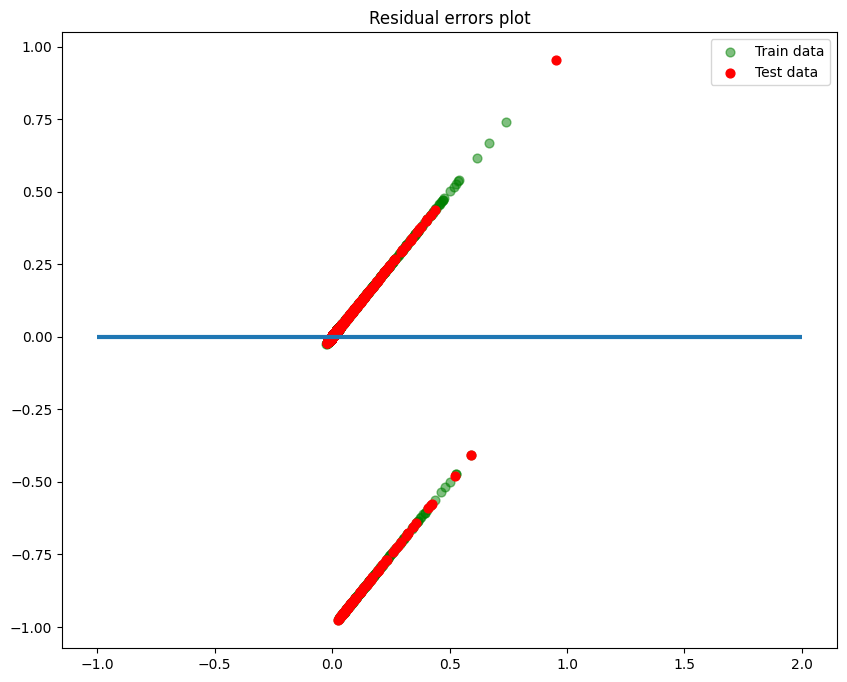

In [25]:
%matplotlib inline
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'g', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -1, xmax = 2, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

In [26]:
y_test[0:5]

79733     0
89285     0
45159     0
112405    0
77178     0
Name: pha, dtype: int64

In [27]:
y_pred[0:5]

array([-0.00266474,  0.0108691 ,  0.00149403,  0.00154815,  0.01686854])

### Q-Q Plot

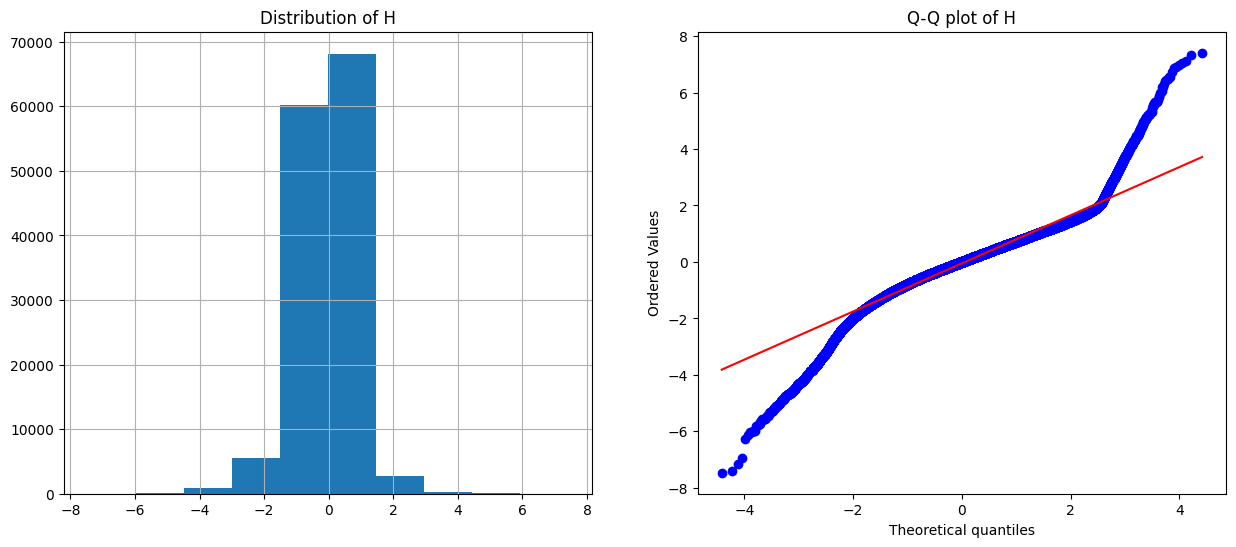

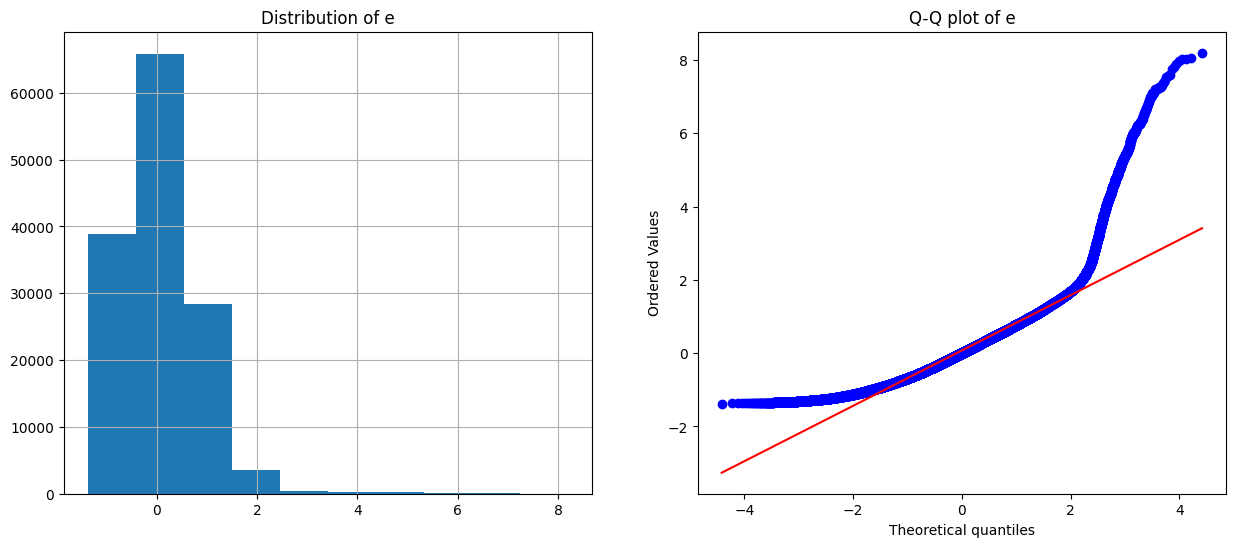

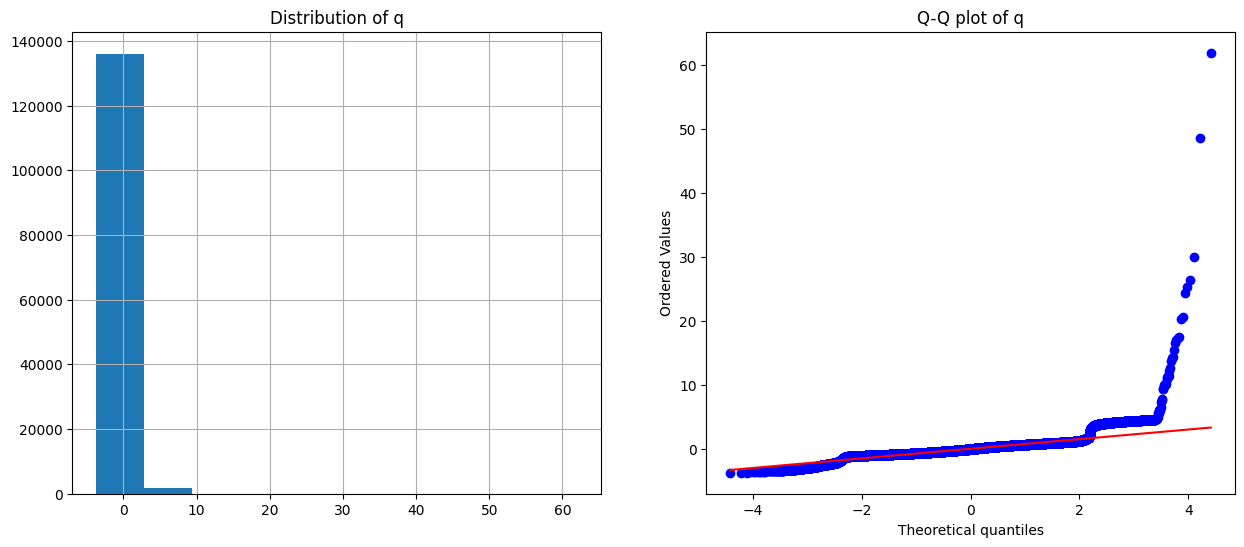

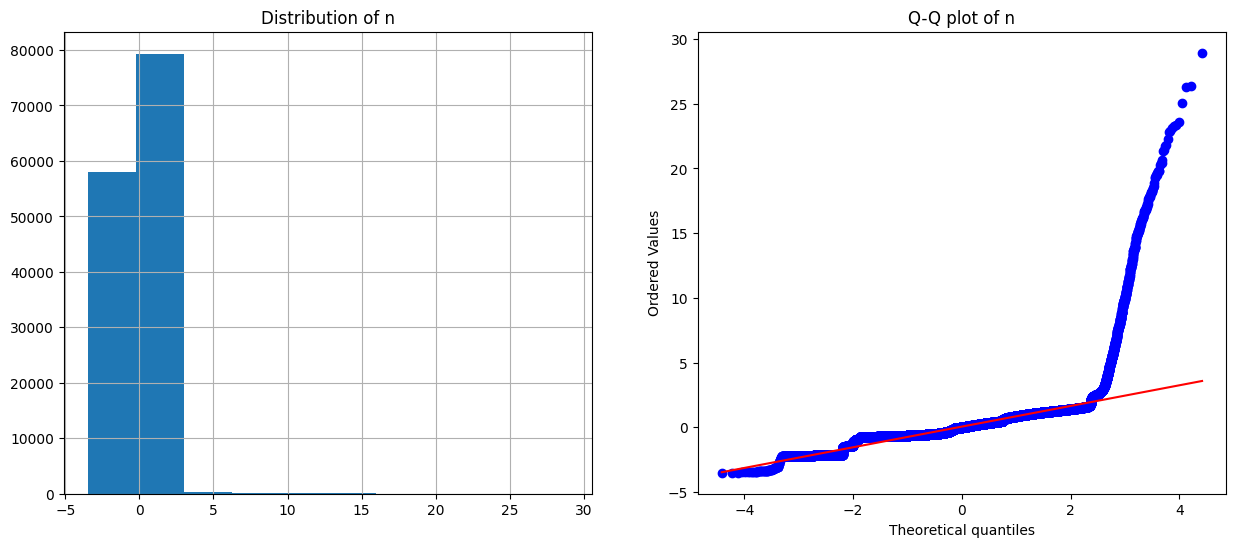

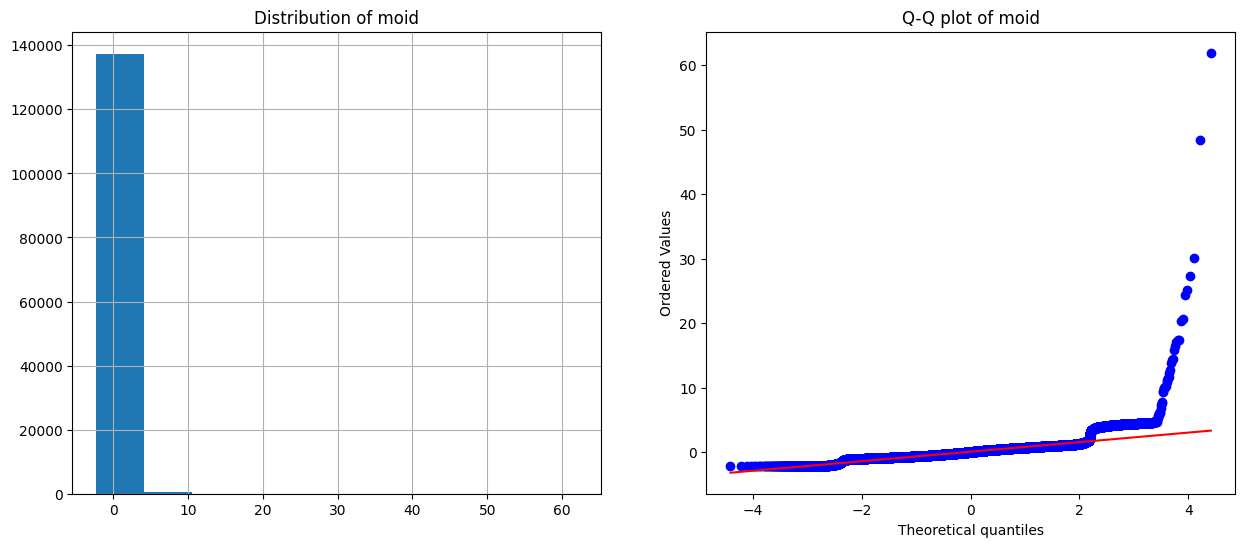

In [28]:
import pylab 
import scipy.stats as stats

exclude_col = ['pha', 'spkid', 'full_name']
asteroid_plot = asteroid_df.drop(columns = exclude_col)

for var in asteroid_plot.columns:
        plt.figure(figsize=(15, 6))

        # Histogram of the variable
        plt.subplot(1, 2, 1)
        asteroid_df[var].hist()
        plt.title('Distribution of ' + var)

        # Q-Q plot for normality
        plt.subplot(1, 2, 2)
        stats.probplot(asteroid_df[var], dist="norm", plot=pylab)
        plt.title('Q-Q plot of ' + var)

        # Display the plots
        plt.show()

##### This does not seem like a good predictor or the data. Perhaps due to lopsided data

In [29]:
sm = SMOTE(random_state = 42) 
X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())

C:\Users\stack\AppData\Local\Temp\ipykernel_32664\1757892739.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_over, y_train_over = sm.fit_resample(X_train, y_train.ravel())


In [30]:
lr2 = LinearRegression()   # instantiate an object lr

lr2.fit(X_train_over, y_train_over)    # Train the model using the training sets

LinearRegression()

In [31]:
# Predict on the test data set
y_pred2 = lr2.predict(X_test)

In [32]:
lr2.predict(X_test)[0:5]

array([-0.05146638,  0.50433252,  0.14436406,  0.14219008,  0.33117189])

In [33]:
print("Number of coefficients:", len(lr2.coef_))
print("Estimated coefficients: {}".format(lr2.coef_))
print("Estimated intercept: {}".format(lr2.intercept_))

Number of coefficients: 5
Estimated coefficients: [ 0.04364485  0.1558644   0.52924743  0.0507796  -0.59869684]
Estimated intercept: 0.05014749727269374


### Evaluate linear regression model

#### RMS

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 0.20


#### R2

In [35]:
from sklearn.metrics import r2_score
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred2)))

R2 Score value: -13.79


In [36]:
# Evaluating training set performance

print("Training set score: {:.2f}".format(lr2.score(X_train_over, y_train_over)))

Training set score: 0.88


In [37]:
# Evaluating test set performance

print("Test set score: {:.2f}".format(lr2.score(X_test, y_test)))

Test set score: -13.79


#### Cross-validation

In [38]:
from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lr2, X, y, cv=5)

In [39]:
# print the 5-fold cross-validation scores
print(cv_scores.round(4))

[ 0.      0.      0.      0.     -0.0116]


In [40]:
# print the avarage 5-fold cross-validation scores
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores).round(4)))

Average 5-Fold CV Score: -0.0023


### Plotting Residual Error

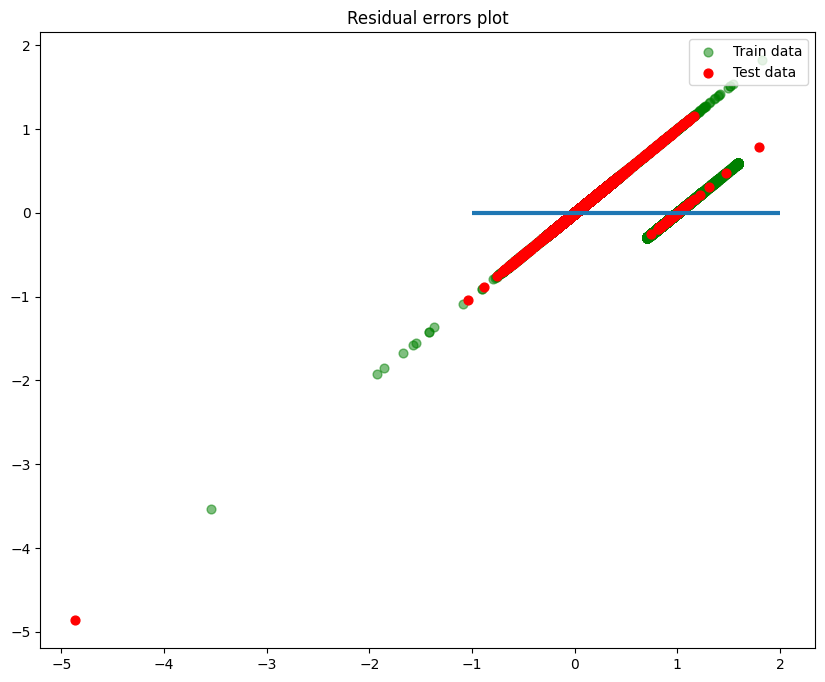

In [41]:
%matplotlib inline
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr2.predict(X_train_over), lr2.predict(X_train_over) - y_train_over, c = 'g', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr2.predict(X_test), lr2.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = -1, xmax = 2, linewidth = 3)

# plotting legend
plt.legend(loc = 'upper right')

# plot title
plt.title("Residual errors plot")

# function to show plot
plt.show()

### Q-Q Plot

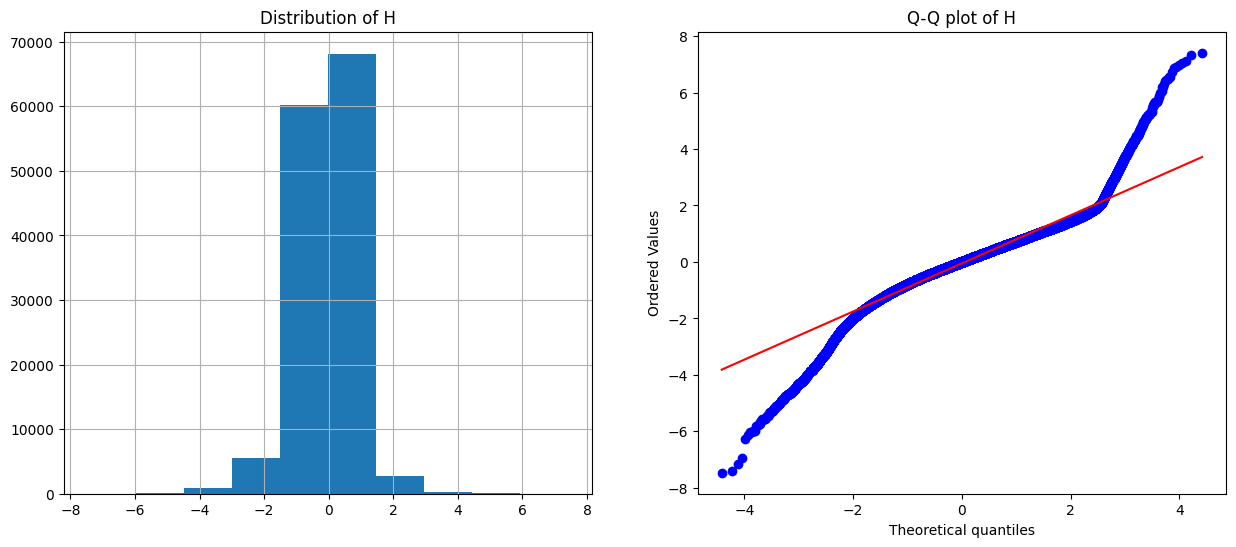

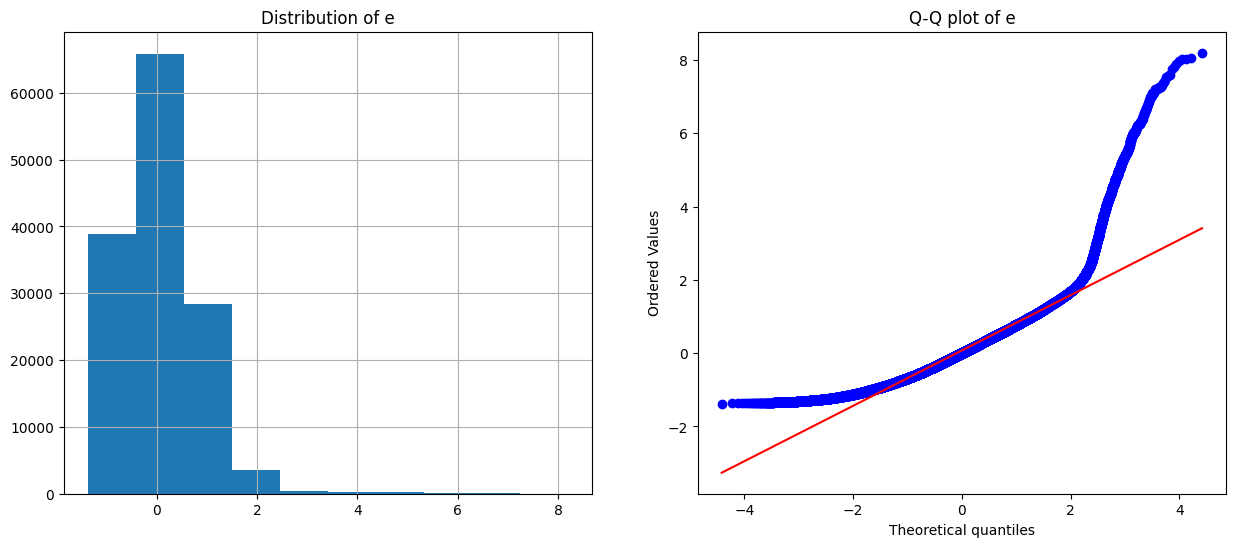

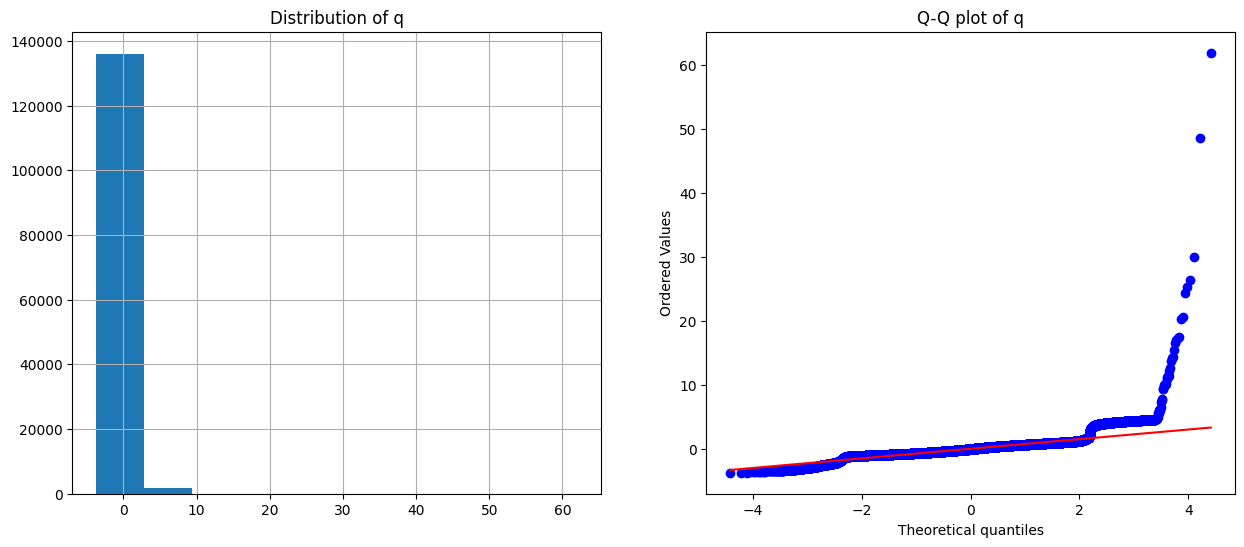

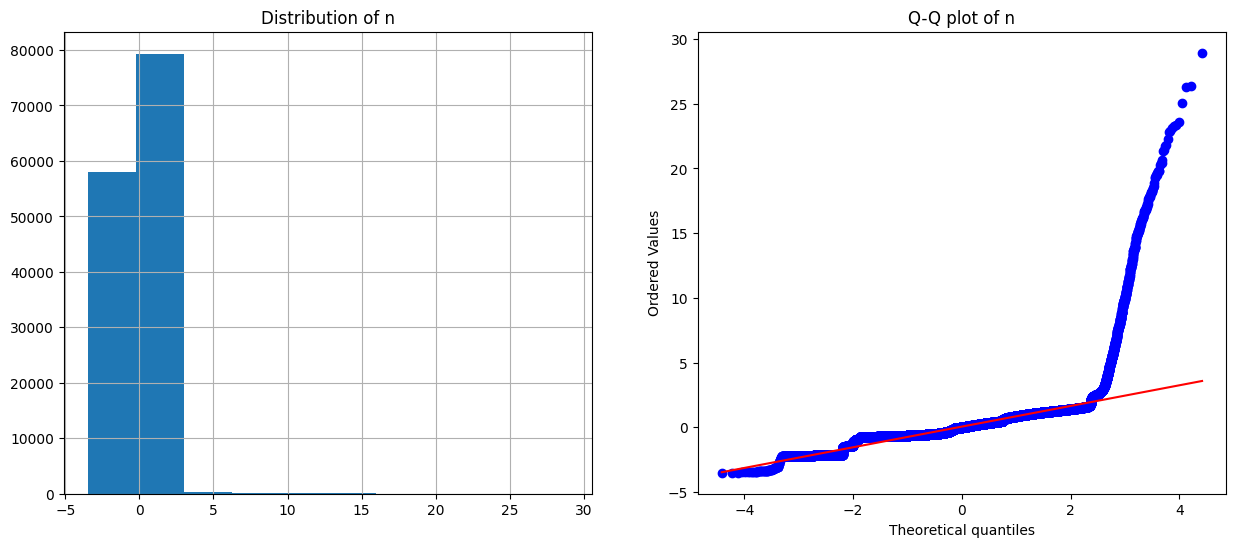

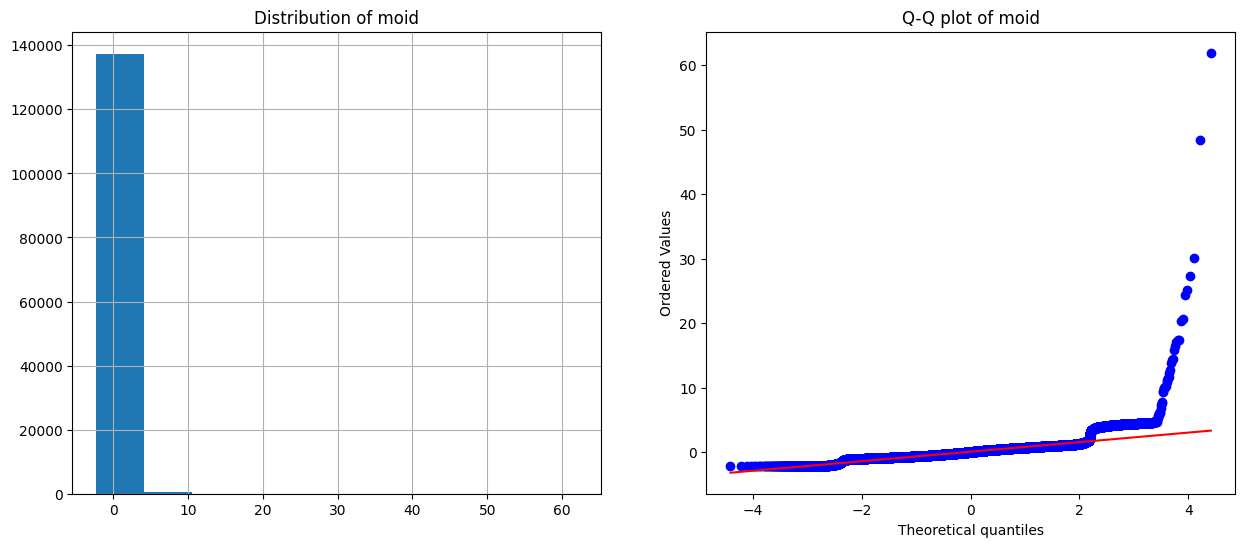

In [42]:
import pylab 
import scipy.stats as stats

exclude_col = ['pha', 'spkid', 'full_name']
asteroid_plot = asteroid_df.drop(columns = exclude_col)

for var in asteroid_plot.columns:
        plt.figure(figsize=(15, 6))

        # Histogram of the variable
        plt.subplot(1, 2, 1)
        asteroid_df[var].hist()
        plt.title('Distribution of ' + var)

        # Q-Q plot for normality
        plt.subplot(1, 2, 2)
        stats.probplot(asteroid_df[var], dist="norm", plot=pylab)
        plt.title('Q-Q plot of ' + var)

        # Display the plots
        plt.show()